In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import warnings
warnings.filterwarnings('ignore')

In [31]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# !unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [10]:
train_path = '/content/drive/MyDrive/cat_dog-classifier/training_set/training_set'
test_path = '/content/drive/MyDrive/cat_dog-classifier/test_set/test_set'

In [16]:
os.listdir(train_path + '/' + 'dogs')
dog_image = train_path + '/dogs/' + 'dog.1858.jpg'

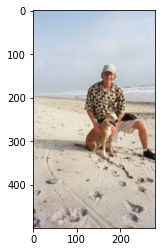

In [17]:
plt.imshow(imread(dog_image))

In [20]:
os.listdir(train_path + '/' + 'cats')
cat_image = train_path + '/cats/' + 'cat.1861.jpg'

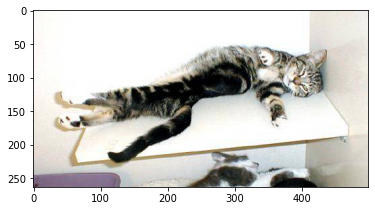

In [21]:
plt.imshow(imread(cat_image))

In [22]:
len(os.listdir(train_path + '/dogs/'))

4006

In [23]:
len(os.listdir(train_path + '/cats/'))

4001

In [24]:
imread(dog_image).shape

(500, 280, 3)

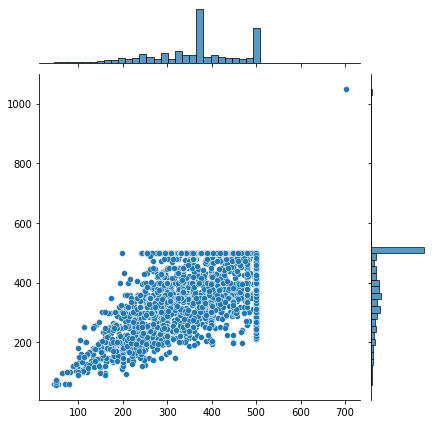

In [26]:
import seaborn as sns
dim1 = []
dim2 = []
for image in os.listdir(train_path + '/dogs/'):
  if image != '_DS_Store':
    img = imread(train_path + '/dogs/' + image)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

sns.jointplot(dim1, dim2)

In [27]:
print(np.mean(dim1))
print(np.mean(dim2))

364.88414481897627
397.987265917603


In [30]:
image_shape = (364, 397, 3)

In [32]:
train_data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.3, height_shift_range=0.3, zoom_range=0.3, horizontal_flip=True, vertical_flip=True, rescale=1/255, shear_range=0.2)
test_data_gen = ImageDataGenerator(rescale=1/255)

In [60]:
training_set = train_data_gen.flow_from_directory(train_path, image_shape[:2], class_mode='binary', batch_size=32)
test_set = test_data_gen.flow_from_directory(test_path, image_shape[:2], class_mode='binary', batch_size=32, shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [34]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [38]:
next(training_set)[0].shape

(32, 364, 397, 3)

In [39]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=image_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', input_shape=image_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(2, 2), activation='relu', input_shape=image_shape, kernel_initializer='he_uniform'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

In [45]:
model.fit(training_set, batch_size=32, epochs=30, validation_data=test_set, callbacks=[early_stop], validation_batch_size=32)

Epoch 1/30
251/251 [==============================] - 296s 1s/step - loss: 1.4245 - accuracy: 0.5633 - val_loss: 0.6689 - val_accuracy: 0.6001
Epoch 2/30
251/251 [==============================] - 281s 1s/step - loss: 0.6688 - accuracy: 0.5948 - val_loss: 0.6391 - val_accuracy: 0.6352
Epoch 3/30
251/251 [==============================] - 281s 1s/step - loss: 0.6520 - accuracy: 0.6210 - val_loss: 0.6183 - val_accuracy: 0.6703
Epoch 4/30
251/251 [==============================] - 281s 1s/step - loss: 0.6401 - accuracy: 0.6337 - val_loss: 0.6021 - val_accuracy: 0.6841
Epoch 5/30
251/251 [==============================] - 281s 1s/step - loss: 0.6374 - accuracy: 0.6400 - val_loss: 0.5961 - val_accuracy: 0.7084
Epoch 6/30
251/251 [==============================] - 282s 1s/step - loss: 0.6344 - accuracy: 0.6401 - val_loss: 0.6152 - val_accuracy: 0.6258
Epoch 7/30
251/251 [==============================] - 281s 1s/step - loss: 0.6236 - accuracy: 0.6553 - val_loss: 0.5573 - val_accuracy: 0.7257

In [46]:
losses = pd.DataFrame(model.history.history)

In [47]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.424526,0.563273,0.668902,0.600099
1,0.668815,0.594753,0.639072,0.635195
2,0.651961,0.620987,0.618256,0.670292
3,0.640078,0.633729,0.602074,0.684132
4,0.637384,0.639975,0.596112,0.708354
5,0.634367,0.640100,0.615195,0.625803
6,0.623618,0.655340,0.557334,0.725655
7,0.611028,0.672954,0.570960,0.724172
8,0.609738,0.671206,0.565804,0.710826
9,0.602629,0.673079,0.545424,0.735541


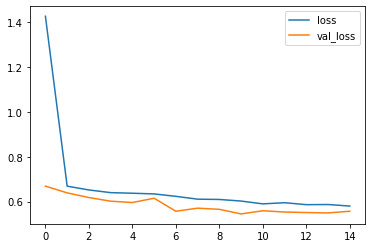

In [48]:
losses[['loss', 'val_loss']].plot()

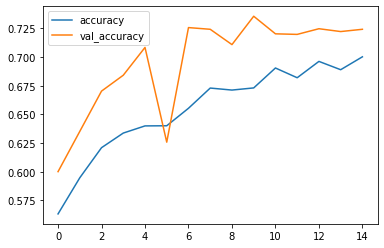

In [50]:
losses[['accuracy', 'val_accuracy']].plot()

In [61]:
model.evaluate(test_set)

64/64 [==============================] - 12s 187ms/step - loss: 0.5573 - accuracy: 0.7242


[0.5572987198829651, 0.7241719961166382]

In [52]:
model.save('classifier.h5')

In [62]:
pred = model.predict(test_set)

In [63]:
pred

array([[0.39644748],
       [0.5958867 ],
       [0.36807102],
       ...,
       [0.14078811],
       [0.5477648 ],
       [0.41779912]], dtype=float32)

In [64]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [65]:
predictions = pred > 0.5

In [66]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1011
           1       0.78      0.62      0.69      1012

    accuracy                           0.72      2023
   macro avg       0.73      0.72      0.72      2023
weighted avg       0.73      0.72      0.72      2023



In [69]:
confusion_matrix(test_set.classes, predictions)

array([[839, 172],
       [386, 626]])

In [73]:
os.listdir(train_path+'/dogs/')
dog = train_path+'/dogs/'+'dog.1892.jpg'

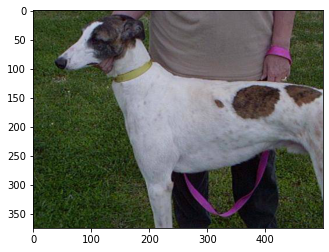

In [74]:
plt.imshow(imread(dog))

In [75]:
dog_image = imread(dog)

In [76]:
dog_image.shape

(375, 499, 3)

In [77]:
image_shape

(364, 397, 3)

In [78]:
new_image = tensorflow.compat.v1.image.resize(
    dog_image, (364, 397), method=tensorflow.image.ResizeMethod.BILINEAR, align_corners=False,
    preserve_aspect_ratio=False, name=None
)

In [79]:
new_image.shape

TensorShape([364, 397, 3])

In [80]:
dog_image = np.expand_dims(new_image, axis=0)

In [82]:
dog_image.shape

(1, 364, 397, 3)

In [83]:
model.predict(dog_image)

array([[1.]], dtype=float32)

In [84]:
test_set.class_indices

{'cats': 0, 'dogs': 1}